## TSF GRIP April'21
### Technical Task 3: Prediction using Decision Tree Algorithm
To create and visualise a decision tree for the iris dataset
### Author: Apoorva Khairnar

#### Step 1: Importing Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#### Step 2: Loading the data

In [41]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df["target"]=iris.target
df
# 0: Iris-setosa
# 1: Iris-versicolor
# 2: Iris-virginica

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### Step 3: Visualizing the data

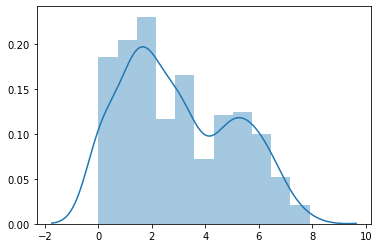

In [43]:
sns.distplot(df)

Text(0.5, 1.0, 'Petal width')

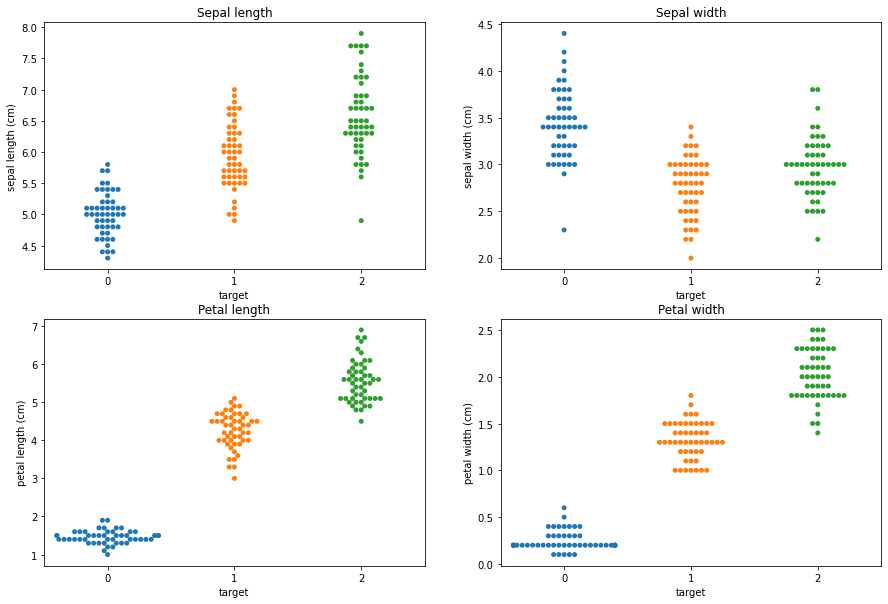

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.swarmplot(ax=axs[0, 0], x='target', y='sepal length (cm)', data=df)
axs[0, 0].set_title('Sepal length')
sns.swarmplot(ax=axs[0, 1], x='target', y='sepal width (cm)', data=df)
axs[0, 1].set_title('Sepal width')
sns.swarmplot(ax=axs[1, 0], x='target', y='petal length (cm)', data=df)
axs[1, 0].set_title('Petal length')
sns.swarmplot(ax=axs[1, 1], x='target', y='petal width (cm)', data=df)
axs[1, 1].set_title('Petal width')

#### Step 4: Developing the model

In [72]:
# Defining features and labels
X=df[iris.feature_names]
y=df["target"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], df["target"], test_size=0.25, random_state=0)

In [73]:
# Developing the decision tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

#### Step 5: Visualizing the developed tree

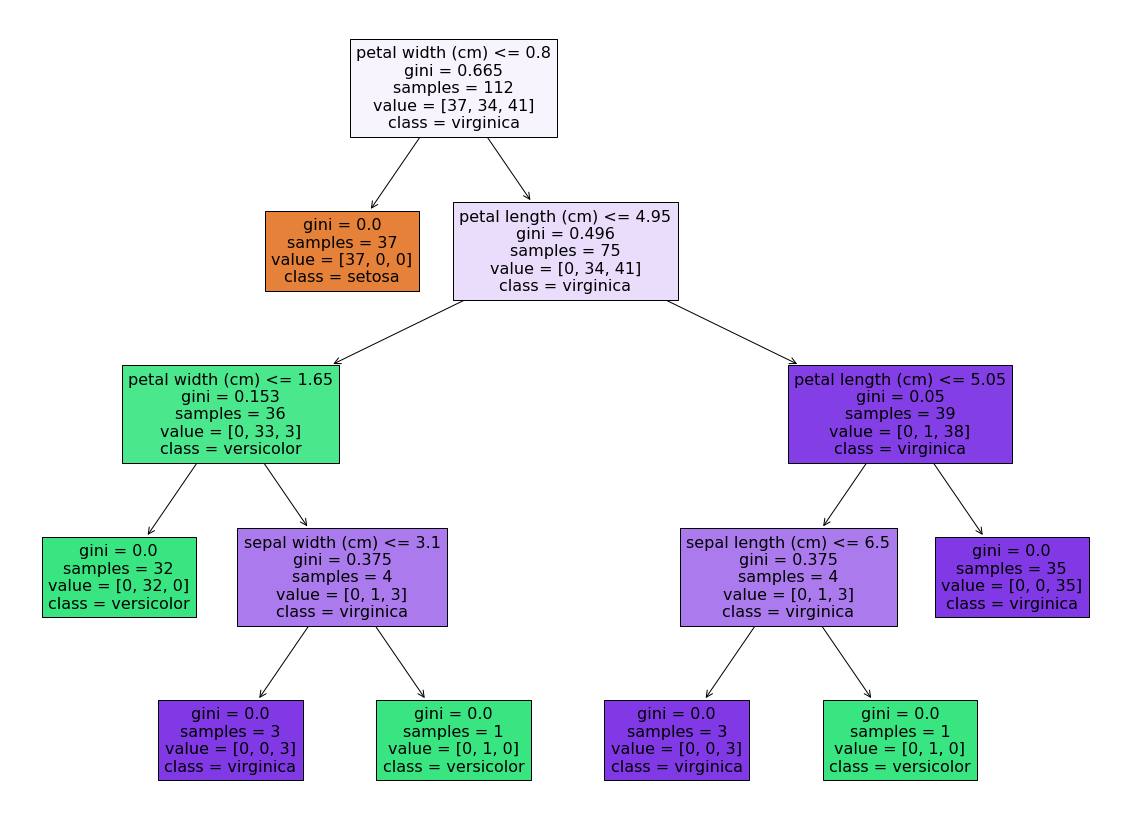

In [5]:
plt.figure(figsize=(20, 15))
fnames=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
cnames=['setosa', 'versicolor', 'virginica']
tree.plot_tree(dtree, feature_names=fnames, class_names=cnames, filled=True)
plt.savefig('iristree.png')

#### Step 6: Making predictions

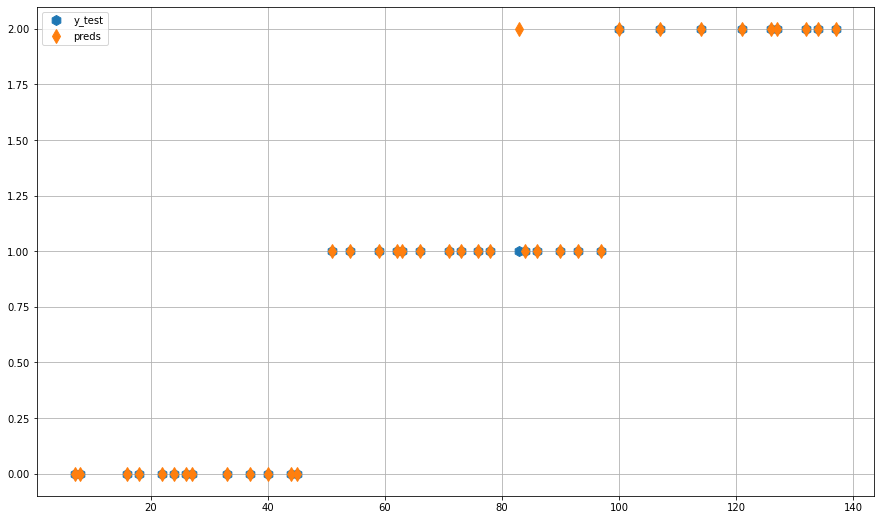

In [104]:
# Predictions without cross validation
preds = dtree.predict(X_test)
df1 = pd.DataFrame({'y_test':y_test, 'preds':preds})
df1.plot(style=['h', 'd'], markersize=10, figsize=(15, 9))
plt.grid()
plt.show()

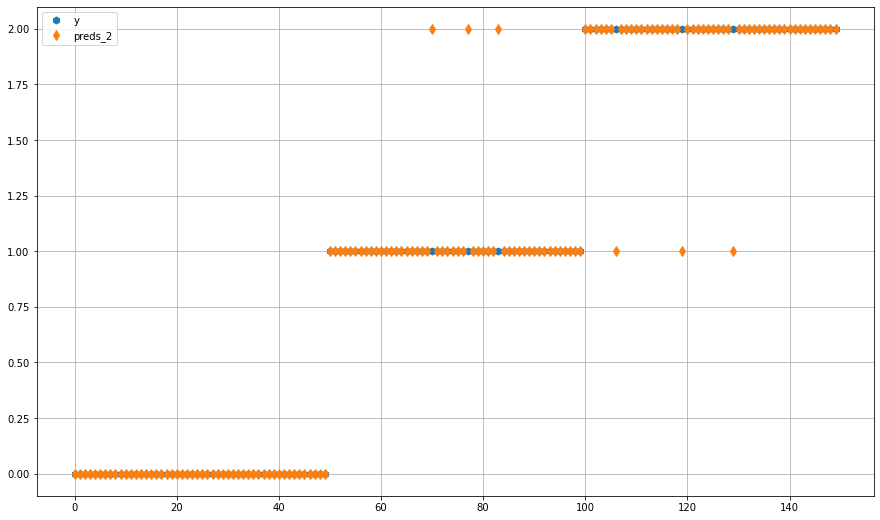

In [102]:
# Predictions using cross validation
preds_2 = cross_val_predict(dtree, X, y, cv=10)
df2 = pd.DataFrame({'y':y, 'preds_2':preds_2})
df2.plot(style=['h', 'd'], markersize=7, figsize=(15, 9))
plt.grid()
plt.show()

#### Step 7: Evaluating the model

##### Evaluation without cross validation

In [8]:
tree_score=dtree.score(X_test, y_test)
tree_score

0.9736842105263158

In [34]:
accuracy = metrics.r2_score(y_test, preds)
print("Accuracy:", accuracy)

Accuracy: 0.9536585365853658


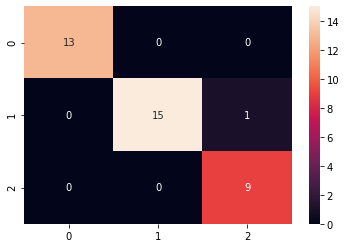

In [107]:
sns.heatmap(confusion_matrix(y_test, preds), annot=True)

##### Evaluation using 10-fold cross validation

In [53]:
# 10-fold cross validation
scores = cross_val_score(dtree, X, y, cv=10)
print ("Cross-validated scores:", scores)

Cross-validated scores: [1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 0.93333333 1.         1.        ]


In [32]:
accuracy = metrics.r2_score(y, preds_2)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.94


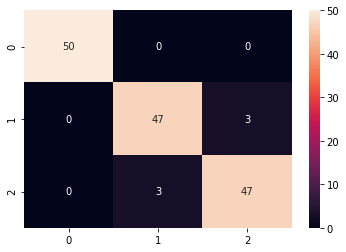

In [108]:
sns.heatmap(confusion_matrix(y, preds_2), annot=True)